<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Homework-Lorentz-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Lorenz equations

One of the most celebrated sets of differential equations in
physics is the Lorenz equations:

$
\frac{dx}{dt} =  \sigma\left(y-x\right),\qquad
\frac{dy}{dt} = rx - y - xz,\qquad
\frac{dz}{dt} =  xy - bz,
$

where $\sigma$, $r$, and $b$ are constants.  (The names $\sigma$, $r$,
and $b$ are odd, but traditional---they are always used in these equations
for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who
derived them from a simplified model of weather patterns.  The
reason for their fame is that they were one of the first incontrovertible
examples of *deterministic chaos*, the occurrence of apparently
random motion even though there is no randomness built into the equations.

#A

Write a program to solve the Lorenz equations for the case
  $\sigma=10$, $r=28$, and $b=\frac83$ in the range from $t=0$ to $t=50$
  with initial conditions $(x,y,z)=(0,1,0)$.  Have your program make a plot
  of $y$ as a function of time.  Note the unpredictable nature of the
  motion.  (Hint: If you base your program on previous code we've written, be careful.
  This problem has parameters $r$ and $b$ with the same names as variables
  in previous programs--make sure to give your variables new names, or use
  different names for the parameters, to avoid introducing errors into your
  code.  In addition, note that you will have three parameters to compute, not just two as in our previous code.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Set your user defined variables for the initial conditions as well as the start and end time and the timestep. Also give the parameter values for the Lorentz equations.

In [ ]:
start =  0.0
end   = 50.0
r_0   =  np.array([0.0, 1.0, 0.0])
t_0   =  0.0
h     =  0.01
sigma_lorentz =  10.0
b_lorentz = 8.0/3.0
r_lorentz = 28.0

Define our function f(r,t). Be sure that it returns the three different slopes.

In [ ]:
def f(r,t):
  x = r[0]
  y = r[1]
  z = r[2]
  fx = sigma_lorentz * (y-x)
  fy = r_lorentz * x - y - x * z
  fz = x * y - b_lorentz * z
  return np.array([fx, fy, fz])

This is the main portion of our code.  Its largely a standard 4th order RK algorithm.  Note that the "rpoints" array has dimensions N x 3.



No handles with labels found to put in legend.


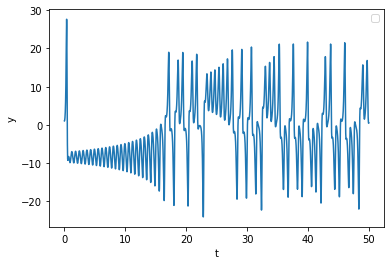

In [ ]:
N = int((end-start)/h) +1 #determine how many points I need. I'm adding 1 to make sure I get both the start and end times
rpoints = np.zeros((N,3)) #define an array for my x values.  Initially set everything to 0.
tpoints = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
rpoints[0] = r_0 #set our initial condition 
tpoints[0] = t_0 #set our initial condition 
for n in range(N-1):
  tpoints[n+1] = h * (n+1)
  r = rpoints[n]
  t = tpoints[n]
  k_1 = h*f(r,t)
  k_2 = h*f(r+ 0.5 *k_1,t+0.5*h)
  k_3 = h*f(r+ 0.5 *k_2,t+0.5*h)
  k_4 = h*f(r+ k_3, t+h)
  rpoints[n+1] = r + (k_1+2*k_2+2*k_3+k_4)/6
plt.plot(tpoints,rpoints[:,1])
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

#B.

Modify your program to produce a plot of $z$ against $x$.  You should
  see a picture of the famous "strange attractor" of the Lorenz
  equations, a lop-sided butterfly-shaped plot that never repeats itself.

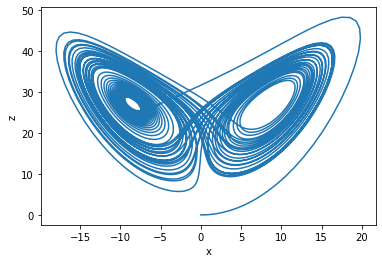

In [ ]:
plt.plot(rpoints[:,0],rpoints[:,2])
plt.xlabel('x')
plt.ylabel('z')
plt.show()

Note that if you want to get a little more insight, you can color the points by the time to see how the system is evolving:

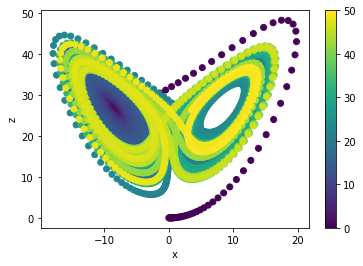

In [ ]:
plt.scatter(rpoints[:,0],rpoints[:,2],c=tpoints)
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()
plt.show()

# Grading (50 points)
* 10 points (part a): Did you write easy to read code that is well documented, including variable names that make sense?
* 20 points (part a): Did you write or modify code that correctly calculates the Lorenz equations? Your code should work in three dimensions and produce the chaotic looking plots shown here.
* 10 points (part a): Did you properly make a plot of t vs y? Are your axis appropriatly labeled in the plot?
* 10 points (part b): Did you properly make a plot of x vs z? Are your axis appropriatly labeled in the plot?